## 棒グラフ:参考
[matplotlib.pyplot.bar](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.bar.html)

[並列表示の棒グラフ](https://stats.biopapyrus.jp/python/barplot.html)


[Matplotlib returning a plot object](https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object)

In [1]:
import openpyxl

wb = openpyxl.load_workbook('図表作成用ファイル.xlsx')
sheet = wb['棒グラフ']

name1 = sheet['A3'].value[1:-1]
name2 = sheet['A4'].value[1:-1]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
range1 = sheet['B3:E4']
range2 = sheet['H3:K4']
range3 = sheet['N3:Q4']

In [15]:
def plot_signal(range_n, title, fig_):
    values = [cell.value for cell in np.array(range_n).T.flatten()]
    x = [name1, name2]
    x_position = np.arange(len(x))
    y1 = values[:2]
    y2 = values[2:4]
    y1_err = values[4:6]
    y2_err = values[6:8]
    sum1_y_yerr = [(y+yerr)*1.03 for y, yerr in zip(y1, y1_err)]
    sum2_y_yerr = [(y+yerr)*1.03 for y, yerr in zip(y2, y2_err)]
#     print(sum1_y_yerr)
    max_ = 0
    ax = fig_.add_subplot(1, 1, 1)
    ax.bar(x_position, y1, width=0.35, label='$+$P', 
           color='#b8dbb9',edgecolor='black', yerr=y1_err, capsize=5)
    ax.bar(x_position + 0.4, y2, width=0.35, label='$-$P',
           color='#3f6b40',edgecolor='black', yerr=y2_err, capsize=5)
    for x_, y1_, y2_ in zip(x_position+0.2, sum1_y_yerr, sum2_y_yerr):
        ax.text(x_, max(y1_, y2_), 'ns', ha='center', fontsize=16)
        max_ = max(max_, max(y1_, y2_))
    ax.set_ylim(bottom=0, top=max_*1.1)
    ax.set_xlabel('Genotype', fontsize=18)
    ax.set_ylabel('Average lateral root weight (mg ${plant}^{-1}$)', fontsize=18)
    ax.set_title(title, fontsize=20)
    ax.legend()
    ax.set_xticks(x_position + 0.2)
    ax.set_xticklabels(x)
    ax.tick_params(labelsize=14)
    return fig_

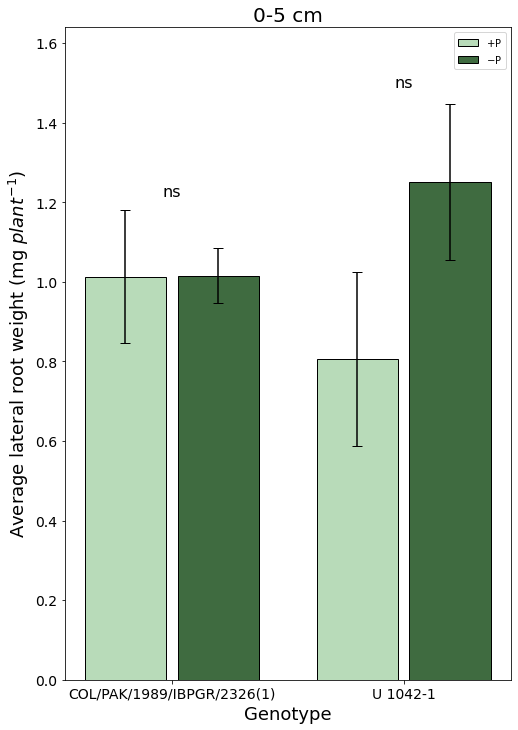

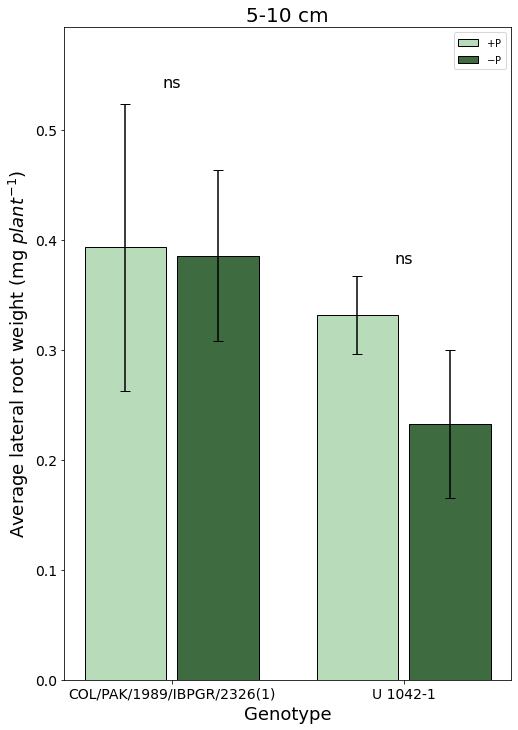

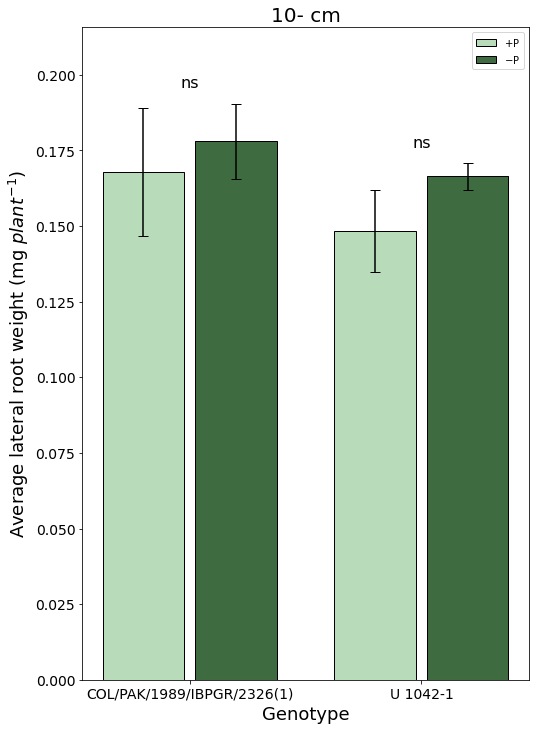

In [18]:
titles = ['0-5 cm', '5-10 cm', '10- cm']
for title, range_ in zip(titles, [range1, range2, range3]):
    fig = plt.figure(figsize=(8,12))
    fig = plot_signal(range_, title, fig_=fig)
    fig